# <font face="times"><font size="6pt"><p style = 'text-align: center;'> The City University of New York, Queens College

<font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Introduction to Computational Social Science</b><br/><br/>


<p style = 'text-align: center;'><font face="times"><b>Lesson 07 | Decision Trees, Random Forests, and Neural Networks</b><br/><br/>

<p style = 'text-align: center;'><font face="times"><b>3 Checkpoints</b><br/><br/>

Source: https://www.python-course.eu/neural_networks.php

Source: https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

Source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

***
***

# Begin Lesson 07
## Decision Trees, Random Forests, and Neural Networks

Random forests are an example of an *ensemble learner* built on decision trees. 

For this reason we'll first discuss decision trees themselves:

### Decision Trees

Here we'll explore a class of algorithms based on Decision Trees. 

Decision Trees encode a series of binary choices in a step-by-step process that mirrors how a person might classify things themselves. It uses an information criterion to decide which question is most useful at each step.

Put simply, it's a bit like the game of "Guess Who?", or "Twenty Questions".

For instance, if you wanted to create a guide to identifying an animal found in nature, you might ask the following series of questions:

- Is the animal bigger or smaller than a meter long?
    + *bigger*: does the animal have horns?
        - *yes*: are the horns longer than ten centimeters?
        - *no*: is the animal wearing a collar
    + *smaller*: does the animal have two or four legs?
        - *two*: does the animal have wings?
        - *four*: does the animal have a bushy tail?

and so on.  This binary splitting of questions is the essence of a decision tree.

![Decision Tree](Images/03_decision_tree.png)

Just so we get some experience with this in python, we'll import the `DecisionTreeClassifier` module from `sklearn.tree`, and create some blobs of data to try it on.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

The `make_blobs` function is a part of sklearn.datasets.samples_generator. All methods in the package, help us to generate data samples or datasets. In machine learning, which scikit-learn all about, datasets are used to evaluate performance of machine learning models.

Let's create some random data with the `make_blobs` function: let's create 300 random points, clustered into four "blobs," and where each blob has some standard deviation ofa bout 0.6.

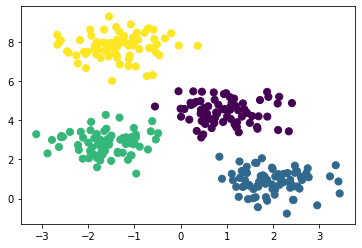

In [2]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

We'll start by defining a convenience function which allows us to plot the predicted value in the background:

In [3]:
def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.3)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

In [4]:
clf = DecisionTreeClassifier(max_depth=10)

Now, let's take a a look at how the decision tree did. What do you think? How did it do? What issues do you think could arise from this?

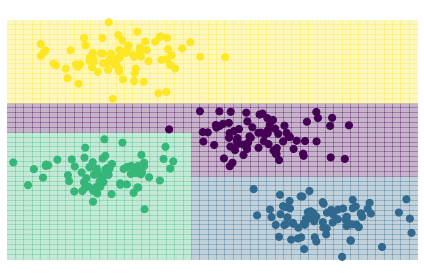

In [5]:
plot_estimator(clf, X, y)

***

# Checkpoint 1 of 3

## Now you try!

### We're going to use the `titanic.csv` datasets again, but now we'll train a decision tree classifier. 

1. First read and clean in these data, just as we did before. 
2. Subset these data to only include the data we're interested in. Here, we're going to use whether passengers survived or not (a categorical variable) as our dependent variable. We'll use other characteristics, including, class (Pclass), sex, age, and Fare as our independent variables. 

### Below, I've provided some starter code for you get set up. 
### Use `GridSearchCV` to optimize on the `max_depth`, the number of layers to the tree. 

### Hint: for the `GridSearchCV`, the parameter space should focus on the `max_depth` as follows:

```Python
parameter_space = {
    'max_depth': [5,10,15,20]
}
```

### Note: Choose depth values that make sense to you! 

First, read in these data, using `pandas`. It's seperated in two parts: Data on the characteristics of the passengers and data on whether they surived. We need to read in both datasets as `DataFrames` and merge them on `PassengerId`. 


In [6]:
import pandas as pd

In [7]:
df_titanic_characteristics = pd.read_csv('Data/titanic_characteristics.csv', index_col='PassengerId')

In [8]:
df_titanic_survived = pd.read_csv('Data/titanic_survived.csv',index_col='PassengerID')

In [9]:
df_titanic=pd.merge(df_titanic_characteristics,df_titanic_survived,left_index=True,right_index=True)

Subset these data, where `PassengerId` is the ID of the passengers. Since we're not using it, we'll  keep it as our `DataFrame`'s index.

In [10]:
df = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

Recode sex from strings to numeric. 

In [11]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

/usr/lib/python3.6/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


As always, be sure to drop NAs from the `DataFrame`. 

In [12]:
df = df.dropna()

Let's set `Survived` as our dependent variable (i.e., our Y) and all other variables as our independent variables (i.e., our X).

In [13]:
y_titanic = df['Survived']
X_titanic = df.drop('Survived', axis=1)

Now, create a generic decision tree classifier. 

In [14]:
model_titanic = DecisionTreeClassifier()

The image, however, will output to your local directories as a `PNG` file. 

So, we'll first need to import a few packages that will display the output here in the Notebook. 

In [15]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

/usr/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


We'll also need to install a module called `pydotplus`, as well. (This may take a few minutes, so be patient!) 

In [16]:
!pip3.6 install --user pydotplus

Looking in links: /usr/share/pip-wheels


Now, let's read `pydotplus` in. 

In [17]:
import pydotplus

Now you take it from here. 

Recall many of the steps you took last time. It's very similar to what you need to do here. 

Just be sure to create a testing and training set, train the model, and optimize on the depth of the tree. To set the data, use this method in `model` to get things started.

**Note**: The examples below use `X_train` and `y_train`, but they may not be labeled as such. 

```Python
    model.fit(X_train, y_train)
```

To plot your decision tree, use the following code below. (In Jupyter Notebook, you may want to include the following bloc of code in one cell.) **Be sure to replace the specific inputs though! This may take a few moments.** 

```Python
    dot_data = StringIO() #This will output your visualization to a PNG file
    export_graphviz(YOUR_TITANIC_FIT_DATA_GOES_HERE, #YOUR DATA GOES HERE
                    out_file=dot_data, 
                    feature_names=YOUR_X_TITANIC_DATA_GOES_HERE.columns, #YOUR DATA GOES HERE
                    filled=True, 
                    rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    Image(graph.create_png()) #This will display the PNG saved to your local directory
```

Finally, use the function `accuracy_score()` and `confusion_matrix()` to see how well the model did:

```Python
    print(accuracy_score(y_test, y_predict))
    print(confusion_matrix(y_test, y_predict))
```

Since we have multiple features, the one thing you **WON'T DO** is use `plot_estimator()` to plot and parse the data with the classifier, as that previous example worked in two-dimensions. (It was also a hypothetical example that was based on simulated data.) For instance, with the Titanic data, we would have to visualize it in multiple dimensions.

What results do you get?

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [19]:
X_titanic = df.drop('Survived', axis=1)
y_titanic = df['Survived']

X_train_chkpt1, X_test_chkpt1, y_train_chkpt1, y_test_chkpt1 = train_test_split(X_titanic, y_titanic, random_state=0) #Split the data
titanic_train_chkpt1 = model_titanic.fit(X_train_chkpt1, y_train_chkpt1) #Fit the training data to the model
y_predict_chkpt1 = titanic_train_chkpt1.predict(X_test_chkpt1) #Now use the test-data (X_Test) to see how well it does 

In [20]:
parameter_space = {
    'max_depth': [5,10,15,20]
}

my_model_grid_search = GridSearchCV(model_titanic, # Your Model 
                                    parameter_space, # Your Parameters
                                    cv=10) # Number of Crossfolds
my_model_grid_search.fit(X_titanic, y_titanic)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [21]:
my_model_grid_search.cv_results_

{'mean_fit_time': array([0.03525426, 0.00558705, 0.00972679, 0.03645568]),
 'std_fit_time': array([0.02181882, 0.00088572, 0.00457514, 0.01988501]),
 'mean_score_time': array([0.01630003, 0.00203266, 0.00540369, 0.01231892]),
 'std_score_time': array([0.00787235, 0.00013858, 0.0048239 , 0.01374889]),
 'param_max_depth': masked_array(data=[5, 10, 15, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': 15},
  {'max_depth': 20}],
 'split0_test_score': array([0.72222222, 0.69444444, 0.72222222, 0.73611111]),
 'split1_test_score': array([0.73611111, 0.76388889, 0.68055556, 0.69444444]),
 'split2_test_score': array([0.75      , 0.76388889, 0.73611111, 0.76388889]),
 'split3_test_score': array([0.86111111, 0.83333333, 0.79166667, 0.80555556]),
 'split4_test_score': array([0.8028169 , 0.83098592, 0.81690141, 0.81690141]),
 'split5_test_score': array([0.78873239, 0.71830986, 

In [22]:
print(my_model_grid_search.best_score_)
print(my_model_grid_search.best_params_)

0.7913165266106442
{'max_depth': 5}


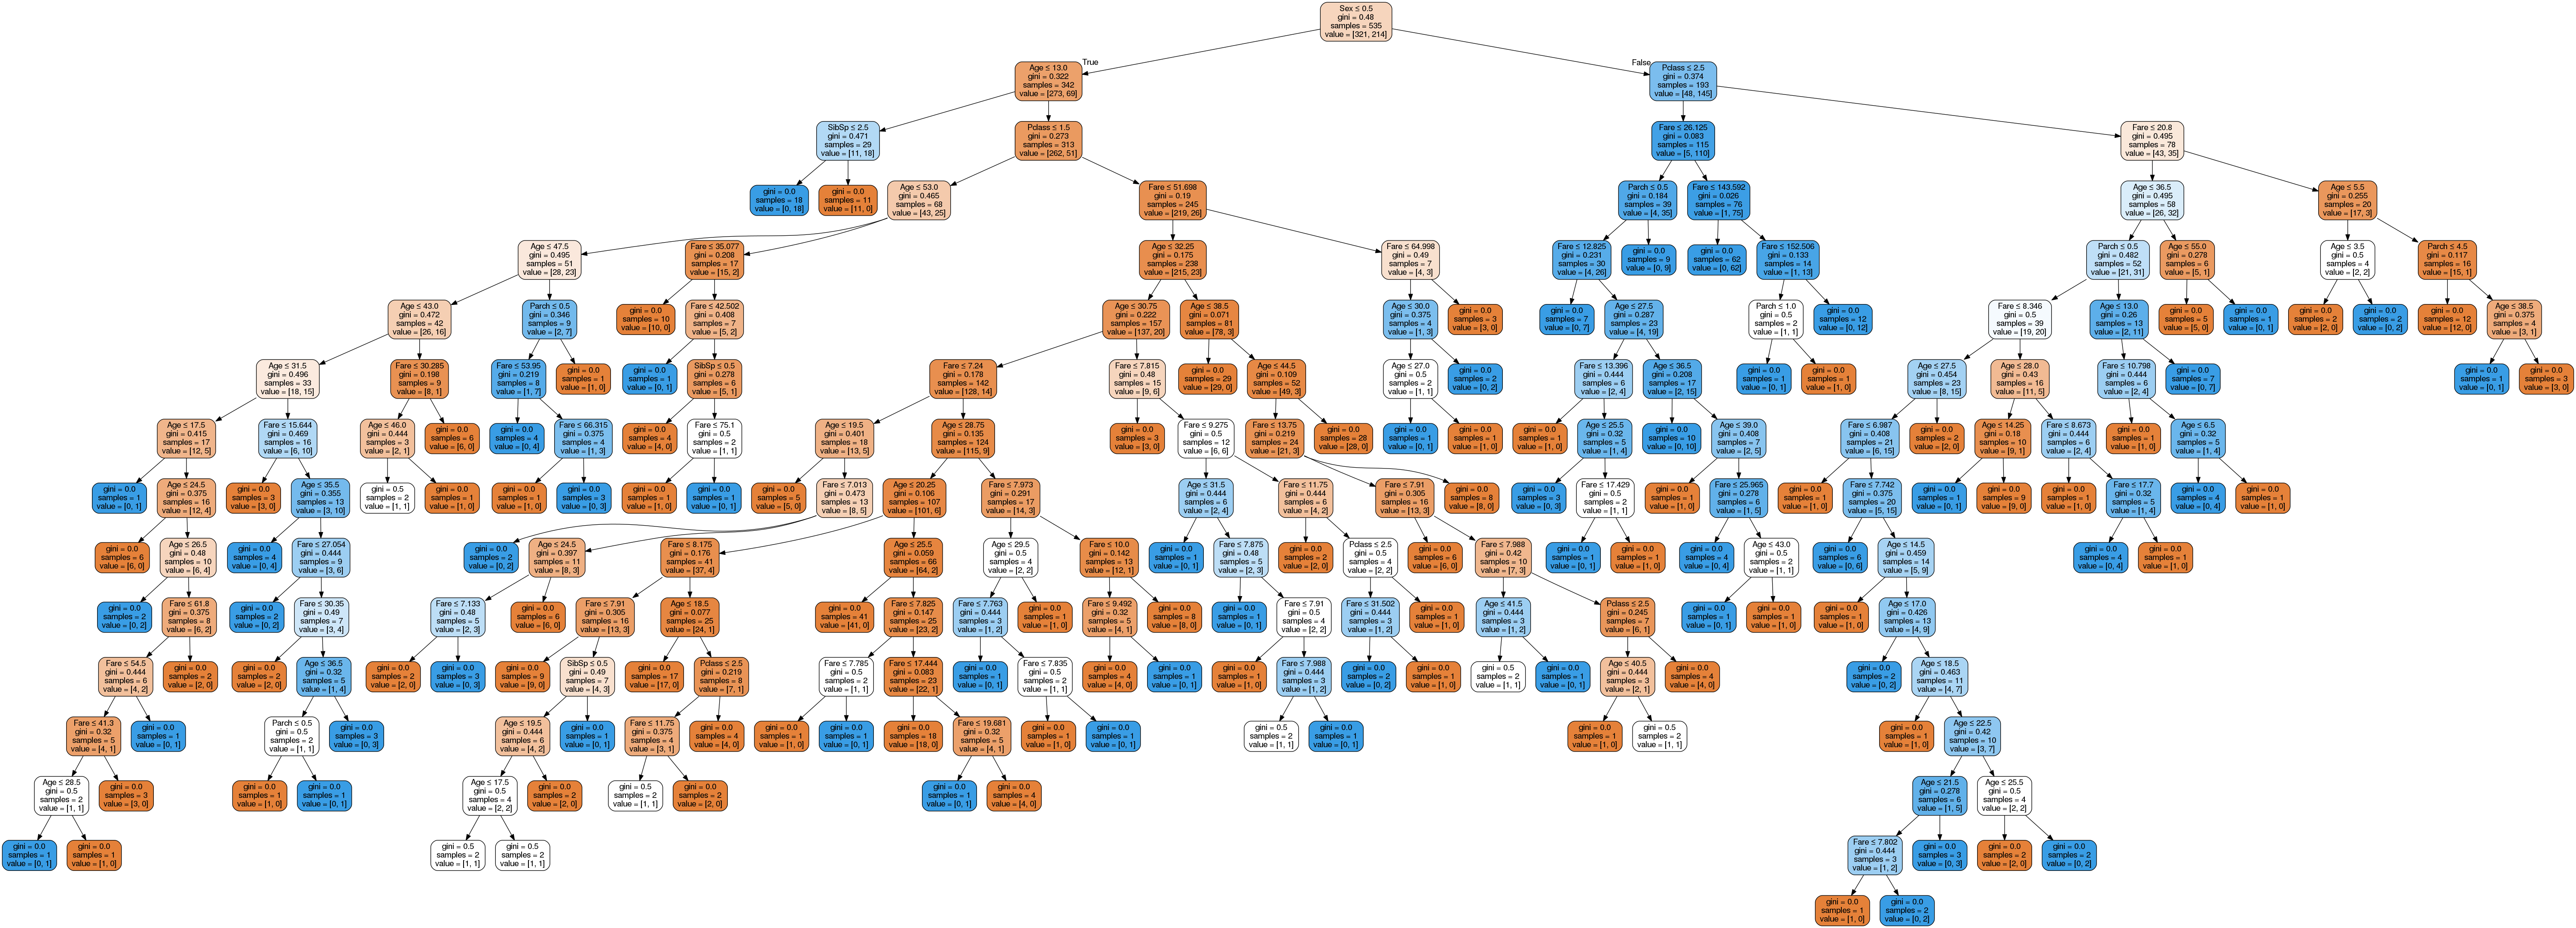

In [23]:
dot_data = StringIO() #This will output your visualization to a PNG file
export_graphviz(titanic_train_chkpt1, #YOUR DATA GOES HERE
                    out_file=dot_data, 
                    feature_names=X_titanic.columns, #YOUR DATA GOES HERE
                    filled=True, 
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) #This will display the PNG saved to your local directory

In [24]:
print(metrics.accuracy_score(y_test_chkpt1, y_predict_chkpt1))
print(metrics.precision_score(y_test_chkpt1, y_predict_chkpt1))
print(metrics.confusion_matrix(y_test_chkpt1, y_predict_chkpt1))

0.7877094972067039
0.7435897435897436
[[83 20]
 [18 58]]


***
***

### Random Forests

Decision trees are a great tool but they can often overfit the training set of data unless pruned effectively, hindering their predictive capabilities. 

Indeed, a big problem with decision trees is that they can end up **over-fitting** the data. 

They are so flexible as models that, given a large depth, they can quickly memorize the inputs, which doesn't generalize well to previously unseen data. 

One way to get around this is to use many slightly different decision trees in concert. This is known as **Random Forests**, and is one of the more common techniques of **ensemble learning** (i.e. combining the results from several estimators).

The "Tree" and "Forest," a Random Forest is essentially a collection of Decision Trees. A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results. After a large number of trees are built using this method, each tree "votes" or chooses the class, and the class receiving the most votes by a simple majority is the "winner" or predicted class.

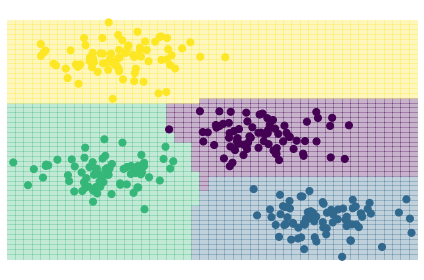

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=0)
plot_estimator(clf, X, y)

The difference from the decision tree to the random forest is subtle in this example. Mainly, it seems to have gotten rid of the purple section's tail (which looked rather arbitrary from the get-go), and rounded the corners somewhat between each cluster.

This helps to avoid weird classification behavior, though. Imagine there were a new data point on the left-middle section of the plot. The decision tree would assign that new data point to the purple group, even though it is plainly closer to the clusters of data points in the yellow and green sections of the plot. Using a random forest helped us avoid that kind of obvious mistake.

For more complicated data the advantages can be even more obvious. Random forests are a very powerful technique.

***

# Checkpoint 2 of 3

## Now you try!

### Repeat what you did for Checkpoint 1, but now run a Random Forest classifier. Again, use the same `titanic` data and `GridSearchCV` to optimize on the number of estimators. And again, use the method `set_model()` to set your data. 

### Here, you can't plot the random forest, as it is an ensemble/collection of multiple decision trees. (For bonus marks, you can visualize ONE decision tree classifier from the random forest.) 

### How do your results compare to just the decision tree when looking at its accuracy and precision? Why?

In [26]:
X_titanic = df.drop('Survived', axis=1)
y_titanic = df['Survived']

X_train_chkpt2, X_test_chkpt2, y_train_chkpt2, y_test_chkpt2 = train_test_split(X_titanic, y_titanic, random_state=0) #Split the data

clf_2 = RandomForestClassifier(n_estimators=5, random_state=0)

titanic_train_chkpt2 = clf_2.fit(X_train_chkpt2, y_train_chkpt2) #Fit the training data to the model
y_predict_chkpt2 = titanic_train_chkpt2.predict(X_test_chkpt2) #Now use the test-data (X_Test) to see how well it does 

In [27]:
parameter_space = {
    'max_depth': [5,10,15,20]
}

my_model_grid_search_chkpt2 = GridSearchCV(clf_2, # Your Model 
                                    parameter_space, # Your Parameters
                                    cv=10) # Number of Crossfolds
my_model_grid_search_chkpt2.fit(X_titanic, y_titanic)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=5, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'max_depth': [5, 10

In [28]:
my_model_grid_search_chkpt2.cv_results_

{'mean_fit_time': array([0.04156749, 0.03063078, 0.0351923 , 0.023283  ]),
 'std_fit_time': array([0.02270459, 0.02008249, 0.00884243, 0.00830515]),
 'mean_score_time': array([0.00837936, 0.00626345, 0.00514913, 0.00601671]),
 'std_score_time': array([0.00624222, 0.00630307, 0.00321647, 0.00450821]),
 'param_max_depth': masked_array(data=[5, 10, 15, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': 15},
  {'max_depth': 20}],
 'split0_test_score': array([0.76388889, 0.72222222, 0.75      , 0.73611111]),
 'split1_test_score': array([0.80555556, 0.79166667, 0.80555556, 0.79166667]),
 'split2_test_score': array([0.76388889, 0.76388889, 0.76388889, 0.77777778]),
 'split3_test_score': array([0.875     , 0.875     , 0.83333333, 0.86111111]),
 'split4_test_score': array([0.78873239, 0.78873239, 0.77464789, 0.78873239]),
 'split5_test_score': array([0.83098592, 0.85915493, 

In [29]:
print(my_model_grid_search_chkpt2.best_score_)
print(my_model_grid_search_chkpt2.best_params_)

0.8165266106442577
{'max_depth': 5}


In [30]:
print(metrics.accuracy_score(y_test_chkpt2, y_predict_chkpt2))
print(metrics.precision_score(y_test_chkpt2, y_predict_chkpt2))
print(metrics.confusion_matrix(y_test_chkpt2, y_predict_chkpt2))

0.7541899441340782
0.7051282051282052
[[80 23]
 [21 55]]


In [31]:
# The accuracy and precision of random forest is lower.

***
***

# Neural Networks

When we say "Neural Networks," we mean artificial Neural Networks (ANN). The idea of ANN is based on biological neural networks like the brain.

Neural Networks are a machine learning framework that attempts to mimic the learning pattern of natural biological neural networks.

The basic structure of a neural network is the neuron. A neuron in biology consists of three major parts: the soma (cell body), the dendrites, and the axon. The dendrites branch of from the soma in a tree-like way and getting thinner with every branch. They receive signals (impulses) from other neurons at synapses. The axon - there is always only one - also leaves the soma and usually tend to extend for longer distances than the dentrites.

Even though the above image is already an abstraction for a biologist, we can further abstract it:

![Neuron](Images/11_neuron_perceptron.png) 

Biological neural networks have interconnected neurons with dendrites that receive inputs, then based on these inputs they produce an output signal through an axon to another neuron. We will try to mimic this process through the use of Artificial Neural Networks (ANN), which we will just refer to as neural networks from now on. The process of creating a neural network begins with the most basic form, a single perceptron. Let's start by explaining the single perceptron.

A **perceptron** of artificial neural networks is simulating the biological neuron pictured above.

***

## The Perceptron

A perceptron has one or more inputs, a bias, an activation function, and a single output. The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output. There are many possible activation functions to choose from, such as the logistic function, a trigonometric function, a step function etc. We also make sure to add a bias to the perceptron, this avoids issues where all inputs could be equal to zero (meaning no multiplicative weight would have an effect).

Once we have the output we can compare it to a known label and adjust the weights accordingly (the weights usually start off with random initialization values). We keep repeating this process until we have reached a maximum number of allowed iterations, or an acceptable error rate.

To create a neural network, we simply begin to add layers of perceptrons together, creating a multi-layer perceptron model of a neural network. You'll have an input layer which directly takes in your feature inputs and an output layer which will create the resulting outputs. Any layers in between are known as hidden layers because they don't directly "see" the feature inputs or outputs.

![Neuron](Images/11_wiki_neural_network.png)  

![Neuron](Images/11_neuron_neural_network.png)  

The input signals get multiplied by weight values. Specifically, each input has its own corresponding weight (or weights, when it is connected to more than one node in the next layer). This way the input can be adjusted individually for every $x_{i}$. We can see all the inputs as an input vector and the corresponding weights as the weights vector.

When a signal comes in--generally marked by a 1 or a 0, though it can vary depending on the application--it gets multiplied by the weight value assigned to that particular input (e.g. 1*$w_{i}$ or 0*$w_{i}$) and passed on to the node(s) in the next layer of the neural network. This can scale: if a neuron has three inputs or outputs, then it has three weights,  each of which can be adjusted individually. The weights usually get adjusted during the learning phase.

After this the modified input signals are summed up. (It is also possible to add a so-called bias "b" to this sum. The bias is a value which can also be adjusted during the learn phase.)

Finally, the actual output has to be determined. For this purpose an activation or step function Φ is used.

![Neuron](Images/11_neuron_neural_network_detailled_view.png)

The simplest form of an activation function is a binary function. If the result of the summation is greater than some threshold s, the result of Φ will be 1, otherwise 0.

![Neuron](Images/11_Function_ANN.png)

The following image shows the general building principle of a simple artificial neural network. In short inputs pass in various numeric values. Each input has some arbitrary weight, where all the weights across the input sum to 100%. 

We combine these inputs and weights into some sort of weighted sum. if this weighted sum is larger than some value (this is the activation function), then this weighted sum passes as output to the next level of the network. However, if this weighted sum is less than some value, then 0 is outputed to the next level. 

Depending onthe number of hidden layers you have, each output is an input to another perceptron. 

These weights are altered during the training session, so each time the ANN is run the weights are (hopefully) improved to get better and better results. 

![Neuron](Images/11_perceptron_activation_simple.png)

***
***

## Creating an "AND" Neural Net

We will write a very simple Neural Network implementing the logical "AND" function. It is defined for two input, as show below. The "AND" function works simiarly to multiplication. 

For instance, if Input 1 "AND" Input 2 are both 0, then the output is 0. However, if Input 1 is 0 "AND" Input 2 is 1, the output is 0 (i.e., 1x0=0). Only when both inputs are 1 will the output be 1. 

This simple Neural Net setup takes in two inputs and produces one output. 

![Neuron](Images/11_Input_Output_Table.png)

Here, I wrote up a three useful functions, bundled together as a "package" called a class. (In many ways, packages we've already encountered like `pandas` and `scikit-learn` are "classes.")

In [32]:
import numpy as np
class ADD_Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights is None:
            self.weights = np.ones(input_length) * 0.5
        else:
            self.weights = weights
        
    @staticmethod
    def unit_step_function(x):
        if x > 0.5:
            return 1
        return 0
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return ADD_Perceptron.unit_step_function(weighted_sum)

`def __call__` is doing the heavy lifting here. 

The variable `weighted_input`  multiplies the inputs by their weights. 
`weighted_sum` simply adds these results together, and the final line applies our step function, which says it should activate only if the sum is greater than 0.5. 

With two inputs of either `1` or `0` and with carefully chosen weights, we can get this neural network to return `1` *only* when the two inputs are *both* `1`.  

So, let's use our handcoded function for a single perceptron with two inputs, and let's give each a weight of 0.5 to do just that.

In [33]:
p = ADD_Perceptron(2, np.array([0.5, 0.5]))

Let's feed the perceptron's two inputs with the values from the table, given by:

- [0,0]
- [0,1]
- [1,0]
- [1,1]

I'm going to feed in each of these inputs one at a time (hence the for-loop) into  `p`, my perceptron class that I made. Remember, this simple perceptron models the AND function. So let's see what the output is for each of these inputs. 

Let's look at the output. 

In [34]:
for x in [np.array([0, 0]), np.array([0, 1]), 
          np.array([1, 0]), np.array([1, 1])]:
    y = p(np.array(x))
    print(x, y)

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


This output matches the table above. In other words, we've coded a very simple (and not very interesting) neural network that works like an AND function. 

Now, let's more to something more complicated. 

***
***

# ANN with `Sci-kit Learn`

Let's move on to actually creating a Neural Network with `sci-kit` learn.

***

## Data

For this analysis we will look at [wine fraud](https://en.wikipedia.org/wiki/Wine_fraud), which is actually a very real thing. We'll test if ANNs can help with this problem. 

We will use the wine data set from the UC, Irvine's Machine Learning Repository. It has various chemical features of different wines, all grown in the same region in Italy, but the data is labeled by three different possible ***cultivars***. 

We will try to build an ANN model that can classify what cultivar a wine belongs to based on its chemical features. (The data comes from [here.](https://archive.ics.uci.edu/ml/datasets/Wine).)

First let's import the dataset, and add header columns with the names function.

In [35]:
import pandas as pd
wine = pd.read_csv('Data/wine_data.csv', 
                   names = ["Cultivator", 
                            "Alchol", 
                            "Malic_Acid", 
                            "Ash", 
                            "Alcalinity_of_Ash", 
                            "Magnesium", 
                            "Total_phenols", 
                            "Falvanoids", 
                            "Nonflavanoid_phenols", 
                            "Proanthocyanins", 
                            "Color_intensity", 
                            "Hue", 
                            "OD280", 
                            "Proline"])

Let's check out the data:

In [36]:
wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


This should have 178 data points with 13 features and 1 label column ("Cultivator") for a total of 14 columns.

In [38]:
wine.shape

(178, 14)

Let's set up our data and our labels. Specifically, "cultivators" is our dependent / outcome variable. 

We'll use all of the other data in this dataframe, except for our y-variable



In [39]:
X = wine.drop('Cultivator',axis=1) 

Let's isolate the y-variable here.

In [40]:
y = wine['Cultivator'] 

Let's take a look at `Cultivator`. It is a categorical variable with three types.  

In [41]:
y.describe()

count    178.000000
mean       1.938202
std        0.775035
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Cultivator, dtype: float64

***

## Train Test Split

Let's split our data into training and testing sets, this is done easily with SciKit Learn's train_test_split function from model_selection:

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

***

## Data Preprocessing

The neural network may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. In other words, we need our variables to be comparable. 

Thus, before we do anything, we need to **standardize** these variables. This usually means centering these varibles (i.e., or substraing the mean of each variable for all of its data points) and then creating some common unit (i.e., usually achieved by then dividing this value by its standard deviation, so that all of your variables are comparable in terms of standard deviations). In other words, all of our variables will have mean = 0 and variance = 1. 

There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

First, fit the training data. We'll use `scaler` to calcualte the mean and standard deviations for each column in the training data. 

In [44]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now apply these values to your training and testing data, so that all of the variables are scaled.

In [45]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Check it out for yourself. The mean for all thirteen variables is 0. You'll notice that it's some super small number like, 5.018959e-17 (i.e., zero). You'll also notice that the standard deviation is 1 for each variable too. 

In [46]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02
mean,-7.560786e-16,1.586033e-16,-1.436455e-15,3.693787e-16,3.935866e-16,9.683148e-17,-1.335607e-16,2.704603e-16,1.652813e-16,2.535566e-16,-1.869849e-16,1.435777e-16,1.882371e-16
std,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00
min,-2.020293e+00,-1.428341e+00,-2.699490e+00,-2.656615e+00,-2.130105e+00,-2.090952e+00,-1.701984e+00,-1.842009e+00,-1.953749e+00,-1.510474e+00,-2.133045e+00,-1.856519e+00,-1.391469e+00
25%,-8.480548e-01,-6.766546e-01,-5.277592e-01,-7.631730e-01,-7.749249e-01,-9.027052e-01,-8.171610e-01,-7.916020e-01,-7.333379e-01,-8.280289e-01,-7.740487e-01,-9.257145e-01,-7.850288e-01
50%,6.702176e-03,-4.433725e-01,4.929450e-03,-5.313230e-02,-1.329975e-01,1.448278e-01,9.782647e-02,-1.451979e-01,-5.716415e-02,-9.205911e-02,4.134890e-02,2.589456e-01,-2.643476e-01
75%,8.248267e-01,7.489584e-01,6.195702e-01,5.892855e-01,5.089299e-01,8.327600e-01,8.821014e-01,5.820067e-01,6.190096e-01,4.788751e-01,7.208469e-01,8.089664e-01,8.229573e-01
max,2.155805e+00,2.943538e+00,2.094708e+00,2.448916e+00,4.431820e+00,2.396242e+00,1.907692e+00,2.198017e+00,3.274229e+00,3.511963e+00,2.261042e+00,1.993626e+00,2.798483e+00


***

## Training the Model

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

If the import of `MLPClassifier` fails, you can upgrade `sklearn` by uncommenting and running the next line of code, but you probably won't need to on this platform. 

In [47]:
#!pip3.6 install --user --upgrade sklearn

In [48]:
from sklearn.neural_network import MLPClassifier

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. 

There are many ways to choose these numbers, but for simplicity we will choose 3 hidden layers with the same number of neurons as there are features in our data set along with 500 max iterations.

How does this work to set up the model? Notice that we have 13 wine features from our dataset. We are including three layers to our ANN. Hence, we pass in a tuple to `hidden_layer_sizes` as (13,13,13). 

This is what it would theoretically look like:

![Three Layer](Images/11_three_layer_ann.png)


In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

**A technical sidenote**: the choice of these numbers in practice can be somewhat complex. [This](http://www.faqs.org/faqs/ai-faq/neural-nets/part1/preamble.html) discussion gives a good run-down on the issue of layer size (and number of layers). 

**In general**, you have as many input nodes as you do features in your dataset, and only as many output nodes as are needed to capture your required output. You only need one output node for a neural network regressor, for instance, since it only has a single number to return. 
Categorical variables are also usually conveyed by a single node, though there are situations (specifically when you want to use a method called `softmax` to figure out those values) when you may need more. Only the most intuitive neural network designers have a good sense of how many nodes to put in the hidden layer(s). Most architectures are initialized with the number of nodes in the hidden layer set to equal the mean between the number of nodes in the input and output layers. Redundant (or un-weighty) nodes are then pruned as the network is trained.

Now that the model has been made we can fit the training data to our model, remember that this data has already been processed and scaled:

In [50]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

You can see the output that shows the default values of the other parameters in the model. 

I encourage you to play around with them and discover what effects they have on your model.

***
***

The downside however to using a Multi-Layer Preceptron model is how difficult it is to interpret the model itself. The weights and biases won't be easily interpretable in relation to which features are important to the model itself.

However, if you do want to extract the MLP weights and biases after training your model, you use its public attributes **coefs_** and **intercepts_**. 

**coefs_** is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1. 

**intercepts_** is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

We have four coefficients, or four lists. 

In [51]:
len(mlp.coefs_) 

4

For each list, there are 13 weights, one for each of the 13 features in our wine dataset. 

In [52]:
len(mlp.coefs_[0]) 

13

In [53]:
len(mlp.intercepts_[0])

13

Now, let's see how we did! 

The final step is to make predictions on our test data. To do so, execute the following script:

In [54]:
predictions = mlp.predict(X_test)

With this, let's look at the classification report to see how well it did in terms of precision. 

What results do you see here? What independent variable did the best?

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.96      1.00      0.98        22
           3       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.99      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



***
***

# Checkpoint 3 of 3

## Now you try!

### Use the Titanic dataset and create your own ANN. Follow the same steps as outlined above (i.e., create a training and test set, standardize the variables, etc.). 

### Be sure to think about the number of input nodes and deep layers for your model. 


### Hint: The parameter space for an `ANN` is quite large! We can't cover all the nuiances here, but use this as a rough guide when deciding on the hidden layer size in the network. 

#### Note: Be sure to change these values so that they correspond to the `Titanic` dataset!

`parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)]
}`

In [57]:
X_titanic = df.drop('Survived', axis=1) # IV
y_titanic = df['Survived'] # DV

X_train_chkpt3, X_test_chkpt3, y_train_chkpt3, y_test_chkpt3 = train_test_split(X_titanic, y_titanic) # Split the data

In [58]:
scaler = StandardScaler() # Standardize

In [59]:
scaler.fit(X_train_chkpt3) # Standardize

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
X_train_chkpt3 = scaler.transform(X_train_chkpt3) # Standardize
X_test_chkpt3 = scaler.transform(X_test_chkpt3)

In [62]:
pd.DataFrame(X_train_chkpt3).describe()

,0,1,2,3,4,5
count,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02
mean,-1.900868e-16,1.224358e-16,-5.229462e-17,4.980440e-18,-8.425244e-17,1.031366e-16
std,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00,1.000936e+00
min,-1.457723e+00,-7.573172e-01,-2.016902e+00,-5.619388e-01,-5.060625e-01,-6.746939e-01
25%,-1.457723e+00,-7.573172e-01,-6.298477e-01,-5.619388e-01,-5.060625e-01,-5.136985e-01
50%,9.019801e-01,-7.573172e-01,-9.066248e-02,-5.619388e-01,-5.060625e-01,-3.598689e-01
75%,9.019801e-01,1.320451e+00,6.507172e-01,5.312876e-01,7.026136e-01,4.947522e-04
max,9.019801e-01,1.320451e+00,3.346643e+00,4.904193e+00,6.745995e+00,9.571596e+00


In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(6,6,6),max_iter=500) #6 features with 3 layers

In [64]:
mlp.fit(X_train_chkpt3,y_train_chkpt3)

/usr/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 6, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
len(mlp.coefs_) 

4

In [66]:
len(mlp.coefs_[0])

6

In [67]:
len(mlp.intercepts_[0])

6

In [68]:
predictions_chkpt3 = mlp.predict(X_test_chkpt3)

In [69]:
print(classification_report(y_test_chkpt3,predictions_chkpt3))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.83      0.72      0.77        72

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

